# See tachometric curves to decide Sensory delay

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# data

In [2]:
og_df = pd.read_csv('../out_LED.csv')
df = og_df[ og_df['repeat_trial'].isin([0,2]) | og_df['repeat_trial'].isna() ]
session_type = 7    
df = df[ df['session_type'].isin([session_type]) ]
training_level = 16
df = df[ df['training_level'].isin([training_level]) ]

# drop rows from df where intended_fix, LED_onset_time and timed_fix are nan
df = df.dropna(subset=['intended_fix', 'LED_onset_time', 'timed_fix'])
tuple_column = list(zip(df['intended_fix'], df['intended_fix'] - df['LED_onset_time']))

In [3]:
# LED OFF Trials

df = df[  df['LED_trial'] == 0 ]

# 1 is right , -1 is left
df['choice'] = df['response_poke'].apply(lambda x: 1 if x == 3 else (-1 if x == 2 else 0))

# 1 or 0 if the choice was correct or not
df['correct'] = (df['ILD'] * df['choice']).apply(lambda x: 1 if x > 0 else 0)

# only valid trials
df = df [ df['timed_fix'] > df['intended_fix']]

In [21]:
bw = 0.01
bins = np.arange(0, 9, bw)

df['RT_bin'] = pd.cut(df['timed_fix'], bins=bins, include_lowest=True)
grouped_by_rt_bin = df.groupby('RT_bin', observed=False)['correct'].agg(['mean', 'count'])
grouped_by_rt_bin['bin_mid'] = grouped_by_rt_bin.index.map(lambda x: x.mid)


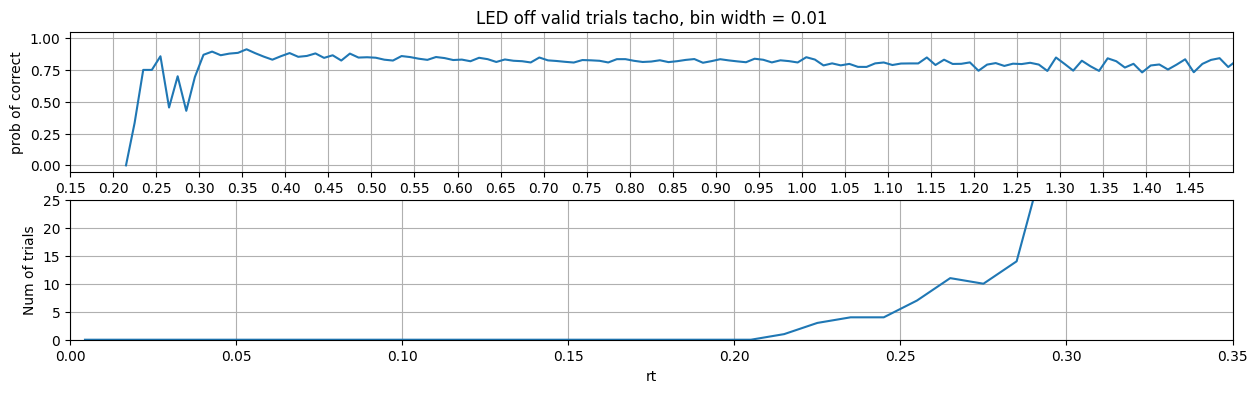

In [31]:
plt.figure(figsize=(15,4))
plt.subplot(2,1,1)
plt.plot(grouped_by_rt_bin['bin_mid'], grouped_by_rt_bin['mean'])

plt.xlim(0.15,1.5)
plt.xlabel('rt')
plt.ylabel('prob of correct')
plt.title(f'LED off valid trials tacho, bin width = {bw}')
plt.grid()
xticks= np.arange(0.15,1.5,0.05)
plt.xticks(xticks)

plt.subplot(2,1,2)
plt.plot(grouped_by_rt_bin['bin_mid'], grouped_by_rt_bin['count'])
plt.xlim(0,0.35)
plt.xlabel('rt')
plt.ylabel('Num of trials')
plt.ylim(0,25)
plt.grid()